In [1]:
%matplotlib inline

In [2]:
import sys 
import os.path
sys.path += [os.path.abspath("../../")]

In [4]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy.stats

In [1]:
import seaborn as sns

In [29]:
# %load load_63x_data.py
import pandas as pd
from lib import filedb

basedir = "/media/nmurphy/BF_Data_Orange/datasets/new_strain_snaps1/"
cell_df = pd.read_hdf(os.path.join(basedir, "single_cell_data.h5"), "cells")
file_df = filedb.get_filedb(os.path.join(basedir, "file_list.tsv"))


def is_a_good_cell(v, mean = 10300, std = 3500):
    if (v < mean + std) & (v > mean - std):
        return True
    else:
        return False

cell_df["good_cell"] = cell_df["red_raw_mean"].apply(is_a_good_cell)
cell_df_filter = cell_df.loc[cell_df["good_cell"], :]

In [8]:
# %load strain_maps.py
from lib import strainmap
import numpy as np

strain_to_type, type_to_strain = strainmap.load()
strain_to_type = {s:t[0] for s,t in strain_to_type.items() }

cell_types = np.unique([ t for t in strain_to_type.values()])


type_to_strain = dict(zip(cell_types, [[]]*len(cell_types)))
for strain, typel in strain_to_type.items():
    type_to_strain[typel] =  type_to_strain[typel] + [strain]

# YFP vs RFP

#### Sig A vs Sig A

In [9]:
sigavsiga = file_df[(file_df["strain"].isin(type_to_strain["et_sigar_sigay"]) & (file_df["time"]==48.0))]
sigavsiga

,path,name,dirname,time,location,strain
file_id,,,,,,
19,NaN,NEB_034_48hrs_63x_2,Set_2/48hrs/63x,48.0,livedish,neb034
20,NaN,NEB_034_48hrs_63x_3,Set_2/48hrs/63x,48.0,livedish,neb034
21,NaN,NEB_034_48hrs_63x_4,Set_2/48hrs/63x,48.0,livedish,neb034


In [11]:
sigavsigb = file_df[(file_df["strain"].isin(type_to_strain["et_sigar_sigby"]) & (file_df["time"]==48.0))]
sigavsigb

,path,name,dirname,time,location,strain
file_id,,,,,,
22,NaN,JLB106_48hrs_63x_1,Set_1/48hrs/63x,48.0,livedish,jlb106
23,NaN,JLB106_48hrs_63x_2,Set_1/48hrs/63x,48.0,livedish,jlb106
24,NaN,JLB106_48hrs_63x_3,Set_1/48hrs/63x,48.0,livedish,jlb106


In [12]:
# strain_sigby = cell_df_filter.loc[cell_df_filter["global_file_id"].isin(sigavsigb.index), :]
# strain_sigay = cell_df_filter.loc[cell_df_filter["global_file_id"].isin(sigavsiga.index), :]

In [30]:
strain_sigby = cell_df.loc[cell_df["global_file_id"].isin(sigavsigb.index), :]
strain_sigay = cell_df.loc[cell_df["global_file_id"].isin(sigavsiga.index), :]

In [13]:
strain_sigay.columns

Index(['image_row', 'image_col', 'distance', 'slice_row', 'slice_col',
       'segment_label', 'area', 'length', 'perimeter', 'eccentricity',
       'red_raw_std', 'red_raw_mean', 'red_raw_meannorm', 'red_raw_maxnorm',
       'green_raw_std', 'green_raw_mean', 'green_raw_meannorm',
       'green_raw_maxnorm', 'global_file_id'],
      dtype='object')

In [14]:
# fig, ax = plt.subplots(1,2)
# fig.set_size_inches(10, 5)
# strain_df.plot.hexbin(x="red_raw_mean", y="green_raw_mean",alpha=0.3, ax=ax[0])
# strain_df.plot.hexbin(x="red_raw_meannorm", y="green_raw_meannorm", alpha=0.3, ax=ax[1])
# fit = np.polyfit(strain_df["red_raw_meannorm"], strain_df["green_raw_meannorm"], 1)
# polyf = np.poly1d(fit)
# xp = np.linspace(0, 4, 100)
# ax[1].plot(xp, polyf(xp))
# ax[0].set_xlim(0, 15000)
# ax[0].set_ylim(0, 15000)

# ax[1].set_xlim(0, 4)
# ax[1].set_ylim(0, 4)

In [16]:
# fig, ax = plt.subplots(1,2)
# fig.set_size_inches(10, 5)
# strain_df.plot.hexbin(x="red_raw_mean", y="green_raw_mean",alpha=0.3, ax=ax[0])
# strain_df.plot.hexbin(x="red_raw_meannorm", y="green_raw_meannorm", alpha=0.3, ax=ax[1])
# fit = np.polyfit(strain_df["red_raw_meannorm"], strain_df["green_raw_meannorm"], 1)
# polyf = np.poly1d(fit)
# xp = np.linspace(0, 4, 100)
# ax[1].plot(xp, polyf(xp))
# ax[0].set_xlim(0, 15000)
# ax[0].set_ylim(0, 15000)

# ax[1].set_xlim(0, 4)
# ax[1].set_ylim(0, 4)

In [ ]:
def plot_histograms(x, bins, ax=None, sideways=False, **kwargs):
    h_y, h_x  = np.histogram(x, bins=bins)
    h_y = h_y/float(len(x))
    a_x = h_x[1:] - ((h_x[1]- h_x[0])/2)
    if ax is not None:
        if sideways:
            ax.plot(h_y, a_x, **kwargs)
        else:
            ax.plot(a_x, h_y, **kwargs)
    return ax, h_y, a_x 

In [59]:
def plot_regression(x, y,  ax=None, **kwargs):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    nx = np.arange(x.min(), x.max(), 100)
    if ax is not None:
        ax.plot(nx, intercept + slope*nx, label="R$^2$: {0:0.03f}".format(r_value**2), **kwargs)
    return ax


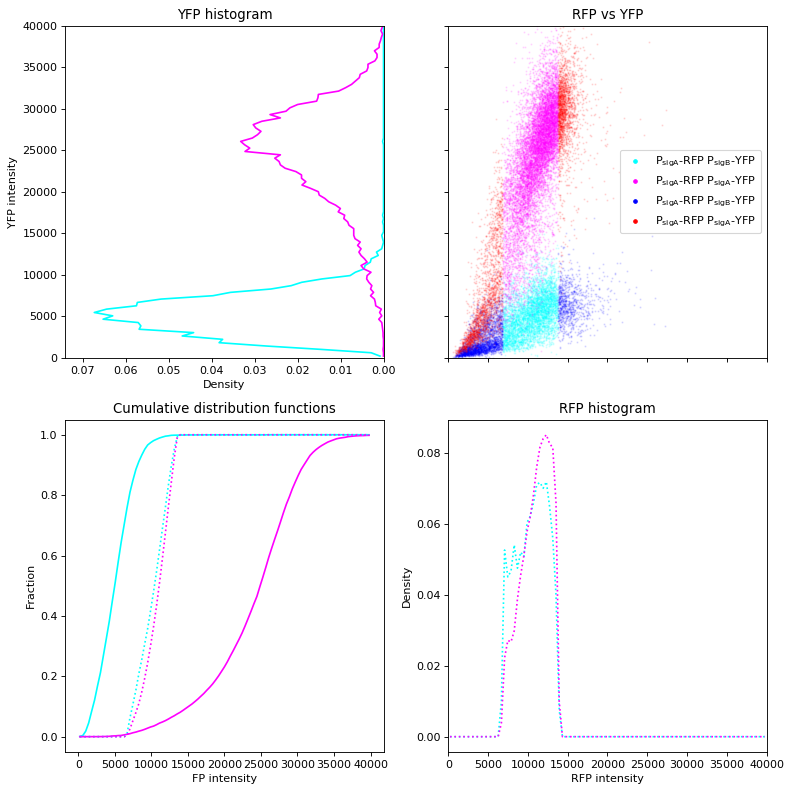

In [75]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10, 10)
fig.set_dpi(80)
ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])
ax[0,1].get_shared_x_axes().join(ax[0,1], ax[1,1])

# red_chan = "red_raw_meannorm"
# green_chan = "red_raw_meannorm"
# bins = np.linspace(0,3.0,100)

bins = np.linspace(0,40000,100)
red_chan = "red_raw_mean"
green_chan = "green_raw_mean"

## good cells 
strain_sigby_good = strain_sigby.loc[strain_sigby["good_cell"],:]
strain_sigay_good = strain_sigay.loc[strain_sigay["good_cell"],:]

strain_sigby_good.plot.scatter(x=red_chan, y=green_chan,s=1, ax=ax[0,1], c="cyan", alpha=0.1)# label=r"P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigB}}$-YFP")
strain_sigay_good.plot.scatter(x=red_chan, y=green_chan,s=1, ax=ax[0,1], c="magenta", alpha=0.1)#, label="P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigA}}$-YFP")
strain_sigby.loc[~strain_sigby["good_cell"],:].plot.scatter(x=red_chan, y=green_chan,s=1, ax=ax[0,1], c="blue", alpha=0.1)
strain_sigay.loc[~strain_sigay["good_cell"],:].plot.scatter(x=red_chan, y=green_chan,s=1, ax=ax[0,1], c="red", alpha=0.1)

ax[0,1].scatter(x=[], y=[],s=10,  c="cyan", alpha=1, label=r"P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigB}}$-YFP")
ax[0,1].scatter(x=[], y=[],s=10, c="magenta",label="P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigA}}$-YFP")
ax[0,1].scatter(x=[], y=[],s=10,  c="blue", alpha=1, label=r"P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigB}}$-YFP")
ax[0,1].scatter(x=[], y=[],s=10, c="red",label="P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigA}}$-YFP")
# mean = 10300
# std = 3500
# ax[0, 1].axvline(mean, color="black", label="mean")
# ax[0, 1].axvspan(mean-std, mean+std,  color='grey', alpha=0.4, label="big bump mean+-std")



# ax[0,1] = plot_regression(strain_sigby[red_chan], strain_sigby[green_chan], ax=ax[0,1], color="blue", linestyle=":")
# ax[0,1] = plot_regression(strain_sigay[red_chan], strain_sigay[green_chan], ax=ax[0,1], color="green", linestyle=":")
# ax[0,1] = plot_regression(strain_sigby_good[red_chan], strain_sigby_good[green_chan], ax=ax[0,1], color="cyan", linestyle="-")
# ax[0,1] = plot_regression(strain_sigay_good[red_chan], strain_sigay_good[green_chan], ax=ax[0,1], color="magenta", linestyle="-")

ax[0,1].set_xlim(0, bins.max())
ax[0,1].set_ylim(0, bins.max())

def histx(xs):
    return xs[1:] - ((xs[1]- xs[0])/2)
   

## Green
ax[0,0], c_sigb_green_y, c_sigb_green_x  = plot_histograms(
    strain_sigby_good[green_chan], bins=bins, sideways=True,
    ax=ax[0,0], color="cyan", label="sigB YFP"
)
ax[0,0], c_siga_green_y, c_siga_green_x  = plot_histograms(
    strain_sigay_good[green_chan], bins=bins, sideways=True,
    ax=ax[0,0], color="magenta", label="sigA YFP"
)

##RED 
ax[1,1], c_sigb_red_y, c_sigb_red_x  = plot_histograms(
    strain_sigby_good[red_chan], bins=bins, sideways=False,
    ax=ax[1,1], color="cyan", label="sigB YFP",linestyle=":"
)
ax[1,1], c_siga_red_y, c_siga_red_x  = plot_histograms(
    strain_sigay_good[red_chan], bins=bins, sideways=False,
    ax=ax[1,1], color="magenta", label="sigA YFP",linestyle=":"
)

ax[0,0].set_xlim(max(c_sigb_green_y.max(),c_siga_green_y.max())*1.1 , 0)

## Cum sum 
cumsum_sigb_green_y = np.cumsum(c_sigb_green_y)
cumsub_siga_green_y = np.cumsum(c_siga_green_y)

cumsum_sigb_red_y  = np.cumsum(c_sigb_red_y)
cumsum_siga_red_y  = np.cumsum(c_siga_red_y)

ax[1,0].plot(histx(bins), cumsum_sigb_green_y,  color="cyan", linestyle="-");
ax[1,0].plot(histx(bins), cumsub_siga_green_y,  color="magenta", linestyle="-" );
ax[1,0].plot(histx(bins), cumsum_sigb_red_y,  color="cyan", linestyle=":" );
ax[1,0].plot(histx(bins), cumsum_siga_red_y,  color="magenta", linestyle=":");
ax[1,1].set_ylabel("Density")
ax[1,1].set_xlabel("RFP intensity")
ax[1,1].set_title("RFP histogram")
ax[0,0].set_xlabel("Density")
ax[0,0].set_ylabel("YFP intensity")
ax[0,0].set_title("YFP histogram")

ax[0,1].set_title("RFP vs YFP")
ax[0,1].legend()

ax[1,0].set_title("Cumulative distribution functions")
ax[1,0].set_xlabel("FP intensity")
ax[1,0].set_ylabel("Fraction")
fig.tight_layout()

fig.savefig("/tmp/siga_yfp_sigb_yfp.png")

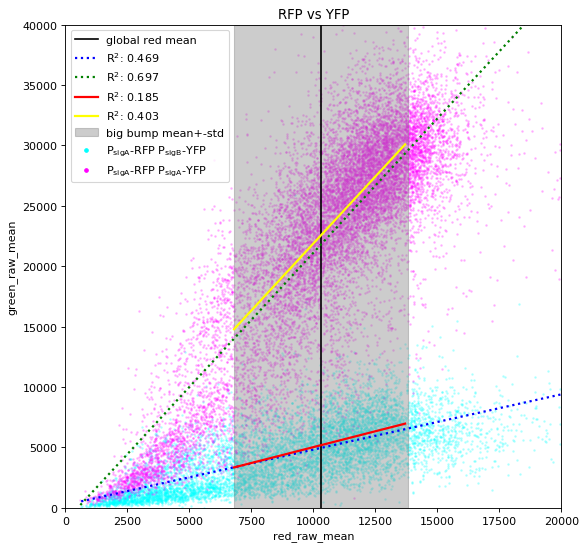

In [76]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 8)
fig.set_dpi(80)

# red_chan = "red_raw_meannorm"
# green_chan = "red_raw_meannorm"
# bins = np.linspace(0,3.0,100)

rbins = np.linspace(0,20000,100)
gbins = np.linspace(0,40000,100)

red_chan = "red_raw_mean"
green_chan = "green_raw_mean"

strain_sigby.plot.scatter(x=red_chan, y=green_chan,s=2, ax=ax, c="cyan", alpha=0.2)# label=r"P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigB}}$-YFP")
strain_sigay.plot.scatter(x=red_chan, y=green_chan,s=2, ax=ax, c="magenta", alpha=0.2)#, label="P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigA}}$-YFP")

ax.scatter(x=[], y=[],s=10,  c="cyan", alpha=1, label=r"P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigB}}$-YFP")
ax.scatter(x=[], y=[],s=10, c="magenta",label="P$_{\mathrm{sigA}}$-RFP P$_{\mathrm{sigA}}$-YFP")

mean = 10300
std = 3500
ax.axvline(mean, color="black", label="global red mean")
ax.axvspan(mean-std, mean+std,  color='grey', alpha=0.4, label="big bump mean+-std")

## good cells 
strain_sigby_good = strain_sigby.loc[strain_sigby["good_cell"],:]
strain_sigay_good = strain_sigay.loc[strain_sigay["good_cell"],:]

ax = plot_regression(strain_sigby[red_chan], strain_sigby[green_chan], ax=ax, color="blue", linestyle=":", linewidth=2)
ax = plot_regression(strain_sigay[red_chan], strain_sigay[green_chan], ax=ax, color="green", linestyle=":", linewidth=2)
ax = plot_regression(strain_sigby_good[red_chan], strain_sigby_good[green_chan], ax=ax, color="red", linestyle="-", linewidth=2)
ax = plot_regression(strain_sigay_good[red_chan], strain_sigay_good[green_chan], ax=ax, color="yellow", linestyle="-", linewidth=2)


ax.set_xlim(0, rbins.max())
ax.set_ylim(0, gbins.max())

ax.set_title("RFP vs YFP")
ax.legend()

fig.savefig("/tmp/siga_yfp_sigb_yfp_scatter.png")